# Observation

[Time-lapse video of the Great Hall in the British Museum](https://youtu.be/VX6xn4NsiMQ)

# Simulation of Ice Cream Shop Visitors

## Libraries and Definition

In [42]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# From https://medium.com/data-science/poisson-process-and-poisson-distribution-in-real-life-modeling-peak-times-at-an-ice-cream-shop-b61b74fb812

def poisson_pmf(k, lambda_val):
    '''
    Calculates and plots the Poisson probability mass function (PMF
    :param k: Number of events to occur at the same time
    :param lambda_val: Lambda value. rate at which the events occur
    :return:
    - Print out the probability that k events occur at the same time with a rate lambda value
    - Plot the PMF from 0 to k occurrences
    '''
    x = np.arange(0, step=0.1, stop=k + 1)
    pmf = poisson.pmf(k=x, mu=lambda_val)
    # print("Poisson:: Probability of having 10 customers at the shop")
    # print(np.round(poisson.pmf(k=k, mu=lambda_val), 3))

    # plotting the PMF
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    # removing all borders except bottom
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.bar(x, pmf * 100, color='#0F72AC')
    plt.xlabel('Number of customers entering shop per hour', fontsize=12, labelpad=20)
    plt.ylabel('P(X=k) | Probability of k occurrences', fontsize=12, labelpad=20)
    plt.show()
# poisson_pmf(k=10, lambda_val=5)

## Distribution Function Visualization

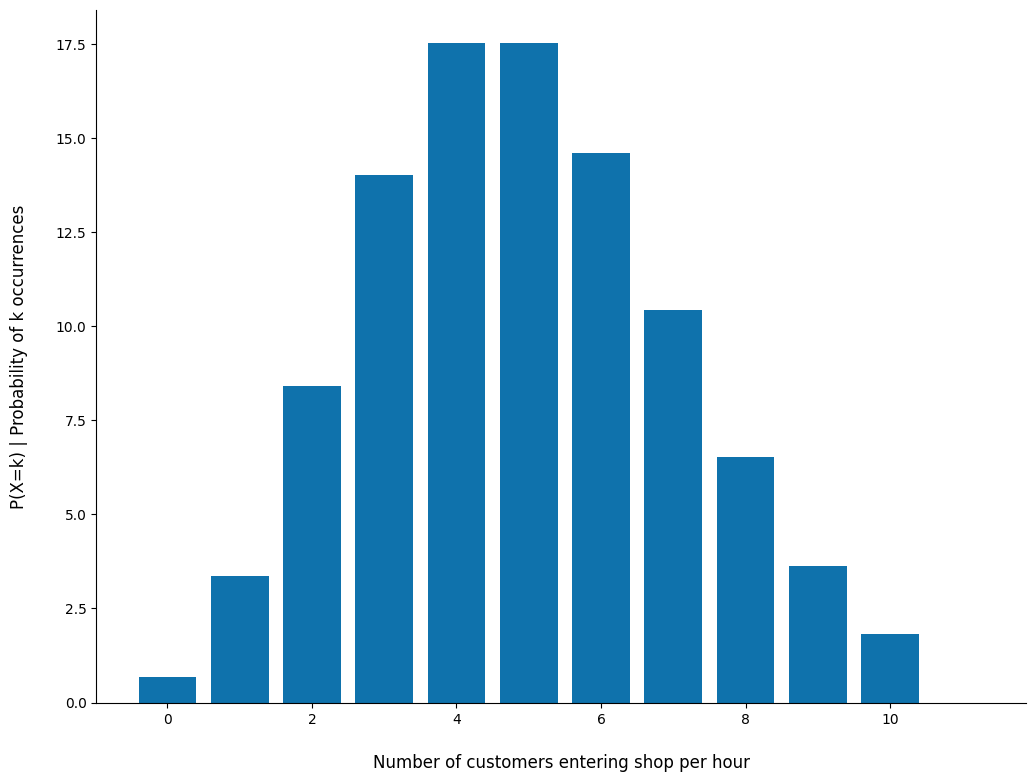

In [41]:
poisson_pmf(k=10, lambda_val=5)

# Theoretical Background: The Poisson Distribution

## The Poisson distribution is a fundamental probability distribution that models the probability of a given number of events occurring in a fixed interval of time or space, assuming these events occur with a known constant mean rate and independently of the time since the last event. It can be derived from the binomial distribution under certain limiting conditions.

## Derivation from the Bernoulli Distribution

### Define Success

Consider a Bernoulli process with a very large number of trials ($n$) and a very small probability of success ($p$) in each trial. Let $x$ be the random variable representing the number of successes in $n$ trials. The probability mass function (PMF) of the binomial distribution is given by:

$$P(x) = \large\binom{n}{x} p^x (1-p)^{n-x}$$

where $$\large\binom{n}{x} = \frac{n!}{x!(n-x)!}$$.

---

### What limit are we assuming?

Now, let's consider the limit as $n \to \infty$ and $p \to 0$, such that the product $np$ remains constant. Let this constant be $\lambda$. So, $\lambda = np$. This means $p = \frac{\lambda}{n}$.

Substituting $p$ in the binomial PMF:

$$P(x) = \frac{n!}{x!(n-x)!} \left(\frac{\lambda}{n}\right)^x \left(1-\frac{\lambda}{n}\right)^{n-x}$$

<br>

$$P(x) = \frac{n(n-1)...(n-x+1)}{x!} \frac{\lambda^x}{n^x} \left(1-\frac{\lambda}{n}\right)^n \left(1-\frac{\lambda}{n}\right)^{-x}$$

---

### Take the limits...

As $n \to \infty$:

$$\frac{n(n-1)...(n-x+1)}{n^x} \to 1$$

$$\left(1-\frac{\lambda}{n}\right)^n \to e^{-\lambda}$$

$$\left(1-\frac{\lambda}{n}\right)^{-x} \to 1$$

Substituting these limits into the expression for $P(x)$:

$$P(x) = \frac{\lambda^x e^{-\lambda}}{x!}$$

This is the probability mass function of the Poisson distribution. Here, $x$ is the number of events (our random variable), and $\lambda$ is the average rate of events in the given interval.

## Connecting to the Simulation Variables

### In our simulation, we consider events occurring over a total time $T$. We divide this total time into a large number of very small time intervals, $\Delta t$. The number of these intervals is $n = \frac{T}{\Delta t}$.

### In each small time interval $\Delta t$, there is a small probability of an event occurring. Let this probability be $p$. The average rate of events per unit of time is given by $\lambda_{\text{rate}}$. So, the probability of an event in a small time interval $\Delta t$ is $p = \lambda_{\text{rate}} \cdot \Delta t$.

### The expected number of events over the total time $T$ is $\lambda = \lambda_{\text{rate}} \cdot T$. This corresponds to the $\lambda$ in the Poisson distribution formula.

In our simulation code:

*   `lambda_rate` corresponds to the average rate of events per unit of time ($\lambda_{\text{rate}}$).
*   `total_time` corresponds to the total time interval ($T$).
*   `delta_t` corresponds to the small time interval ($\Delta t$).
*   `p_event` corresponds to the probability of an event occurring in `delta_t` ($p = \lambda_{\text{rate}} \cdot \Delta t$).
*   The simulated number of events in a given interval corresponds to the random variable $x$.

The Poisson distribution predicts the probability of observing $x$ events in the total time $T$ with an average rate $\lambda_{\text{rate}}$, where $\lambda = \lambda_{\text{rate}} \cdot T$.

Furthermore, for a Poisson distribution with parameter $\lambda$:

*   The mean (first moment) is $E[x] = \lambda$.
*   The variance is $\text{Var}[x] = \lambda$.
*   The standard deviation is $\sigma = \sqrt{\lambda}$.

In our simulation plots of the distribution of average count rates over intervals of duration $D$, the average number of counts per interval will approach $\lambda_{\text{rate}} \cdot D$. The distribution of these counts will follow a Poisson distribution with parameter $\lambda = \lambda_{\text{rate}} \cdot D$.

# Load Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random


# Simulating Poisson Statistics

## The remainder of this notebook explores simulations of a Poisson process, which is often used to model the number of events occurring in a fixed interval of time or space, given a constant average rate. Examples include radioactive decay, photon arrivals at a detector, or customer arrivals at a service center.

## In this simulation, we will:
1. Generate arrival times for events based on an average rate.
2. Visualize the event counts over time.
3. Examine the distribution of times between consecutive events.
4. Explore how the measured average count rate varies with the length of the sampling interval.


## Provide Simulation Variables

In [48]:
# Define the parameters for the simulation.
lambda_rate = 5  # Average rate of events per unit of time
total_time = 100  # Total simulation time

# Define the parameters for the iterative simulation method.
# Choosing a very small time window (delta_t)
delta_t = 0.0001 # units of time

# The probability of an event occurring in a small time window is lambda * delta_t
p_event = lambda_rate * delta_t

## Simulate Arrival Times at Detector

Let's simulate the time differences between consecutive events by considering detection probabilities within very small time windows. This approach reflects a physical detection process where we are constantly "listening" for an event.

### Primary simulation:

while current_time <= simulation_end_time:

    if np.random.random() < p_event:
        simulated_arrival_times_iterative.append(current_time)
    current_time += delta_t

### Code

In [49]:
# Simulate event arrival times iteratively over time
simulated_arrival_times_iterative = []
current_time = 0

# Simulate slightly beyond total_time to ensure we cover the full duration
simulation_end_time = total_time * 1.1 # Simulate 10% longer

# Note- check for array truncation so that we have two data sets witht the same number of events.

while current_time <= simulation_end_time:
    # Simulate whether an event occurs in the current small time window
    if np.random.random() < p_event:
        simulated_arrival_times_iterative.append(current_time)
    current_time += delta_t

# Filter arrival times to include only those within the total simulation time.
simulated_arrival_times = np.array(simulated_arrival_times_iterative)
simulated_arrival_times = simulated_arrival_times[simulated_arrival_times <= total_time]

# Calculate time differences
time_diffs_simulated = np.diff(simulated_arrival_times)


# Display the first few simulated arrival times
print("First 10 simulated arrival times (iterative method):")
print(simulated_arrival_times[:10])

# Display the total number of simulated events
print(f"\nTotal number of simulated events within simulation time (iterative method): {len(simulated_arrival_times)}")

# Display the calculated rate with 3 significant figures
print(f"\nRate: {1/np.mean(time_diffs_simulated):.3g}")

First 10 simulated arrival times (iterative method):
[0.0373 0.1321 0.3831 0.7192 0.7245 1.1557 1.1569 1.3224 1.3659 1.6256]

Total number of simulated events within simulation time (iterative method): 480

Rate: 4.82


### Text explanation

The simulation of event arrival times begins by initializing an empty list, `simulated_arrival_times_iterative`, to hold the times when events are detected, and setting the `current_time` to 0. To ensure all events within the desired `total_time` are captured, the simulation runs slightly longer, up to a calculated `simulation_end_time`. A loop then progresses through small time increments of `delta_t`. In each increment, a check is performed based on `p_event`, the probability of an event occurring in that small window, which is determined by the underlying rate. If an event is simulated to occur, the `current_time` is recorded in the `simulated_arrival_times_iterative` list. After the loop finishes, the collected `simulated_arrival_times_iterative` are converted into a NumPy array, `simulated_arrival_times`, and filtered to include only those events that occurred within the original `total_time`. Finally, the `time_diffs_simulated` between consecutive events in this filtered list are calculated to analyze the time intervals between arrivals.

## Use Theoretical Distribution Functions to Generate Arrival Times

In [50]:
# Generate 'simulated' data using theoretical distribution functions

# Generate the time differences between consecutive events using an exponential distribution with a scale equal to 1/lambda.
# We generate more events than likely needed to ensure we cover the total simulation time
# The expected number of events is lambda_rate * total_time
expected_events = lambda_rate * total_time

# Generate a buffer of additional events
buffer_events = int(expected_events * 0.2) # add a 20% buffer
num_events_to_generate = expected_events + buffer_events

time_diffs = np.random.exponential(scale=1/lambda_rate, size=int(num_events_to_generate))

# Calculate the cumulative sum of the time differences to get the arrival times of the events.
expected_arrival_times = np.cumsum(time_diffs)

# Filter the arrival times to include only those within the total simulation time.
expected_arrival_times = expected_arrival_times[expected_arrival_times <= total_time]

# Display the first few arrival times
#print("First 10 arrival times:")
print(expected_arrival_times[:10])

# Display the total number of events and rate
print(f"\nTotal number of events within simulation time: {len(expected_arrival_times)}; Rate: {1/np.mean(time_diffs):.3g} per time unit")

[0.18237682 0.43707873 0.50255965 0.66867574 0.95514907 1.21124993
 1.31562358 1.50923304 1.8306921  1.84434554]

Total number of events within simulation time: 510; Rate: 5.03 per time unit


# Measured Signal Over Time

### Plotting the variation in the count rate in time is representative of many experimental signals, for example an electron current or counts on a photon detector. Below we use the simulation to plot the counts per interval in a time series of sampling intervals. This represents our "measured signal." You can see that the number of events per interval fluctuates around the average rate. This fluctuation is inherent in a Poisson process. For comparison, we generate counts per interval using the theoretical Poisson distribution function.



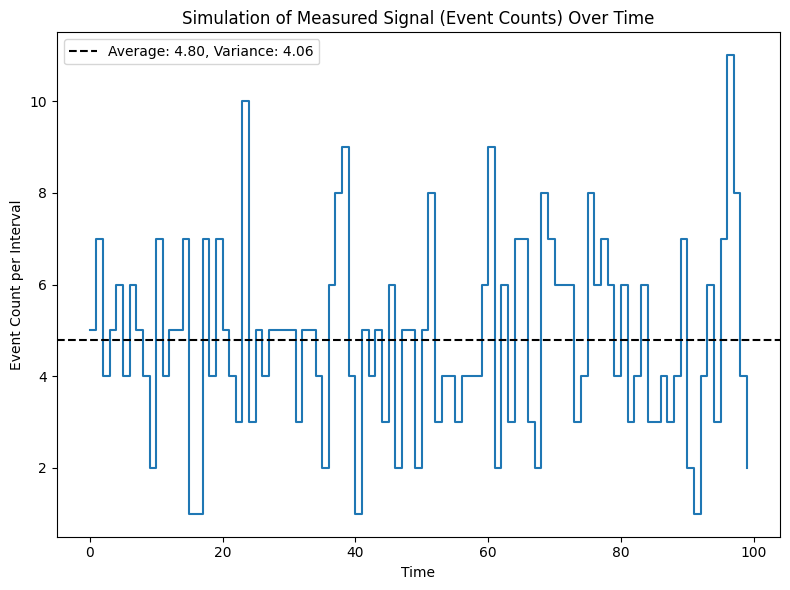

In [52]:
# Define a sampling interval for measuring the signal over time.
sampling_interval =1  # units of time

# Create a sequence of time bins based on the sampling interval and the total simulation time. One can later bin larger if desired.
time_bins = np.arange(0, total_time + sampling_interval, sampling_interval)

# Count the number of events that fall into each time bin
counts_exponential, bin_edges = np.histogram(expected_arrival_times, bins=time_bins)
counts_simulated, bin_edges = np.histogram(simulated_arrival_times, bins=time_bins)

# Calculate the average count rate for each dataset
average_counts_exponential = np.mean(counts_exponential)
average_counts_simulated = np.mean(counts_simulated)
variance_counts_simulated = np.var(counts_simulated)


# Plot the counts per time bin against the time bin edges to visualize the signal over time.
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Changed to 1 subplot

ax.step(bin_edges[:-1], counts_simulated, where='post')
ax.axhline(y=average_counts_simulated, color='black', linestyle='--', label=f'Average: {average_counts_simulated:.2f}, Variance: {variance_counts_simulated:.2f}')
ax.set_xlabel("Time")
ax.set_ylabel("Event Count per Interval")
ax.set_title("Simulation of Measured Signal (Event Counts) Over Time")
ax.legend()


# 6. Display the plot.
plt.tight_layout()
plt.show()

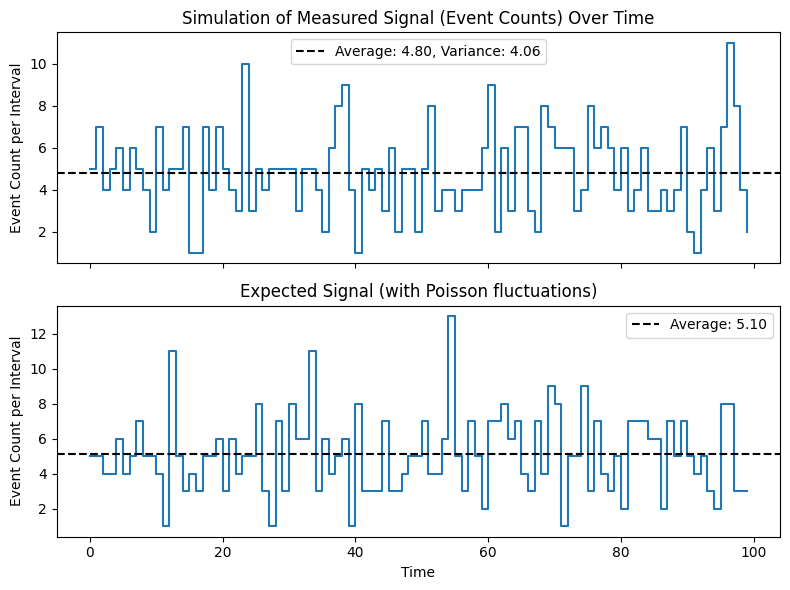

In [53]:
# Plot the counts per time bin against the time bin edges to visualize the signal over time.
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axes[0].step(bin_edges[:-1], counts_simulated, where='post')
axes[0].axhline(y=average_counts_simulated, color='black', linestyle='--', label=f'Average: {average_counts_simulated:.2f}, Variance: {variance_counts_simulated:.2f}')
axes[0].set_ylabel("Event Count per Interval")
axes[0].set_title("Simulation of Measured Signal (Event Counts) Over Time")
axes[0].legend()


axes[1].step(bin_edges[:-1], counts_exponential, where='post')
axes[1].axhline(y=average_counts_exponential, color='black', linestyle='--', label=f'Average: {average_counts_exponential:.2f}')
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Event Count per Interval")
axes[1].set_title("Expected Signal (with Poisson fluctuations)")
axes[1].legend()


# 6. Display the plot.
plt.tight_layout()
plt.show()

# Distribution of times between individual detection events

### Now let's revisit what generated the signal- individual counts with time gaps in between counts. Although the average counts per time ($\lambda$) is constant, the time between specific detection events varies. Let's consider the distribution of the time intervals between consecutive events.

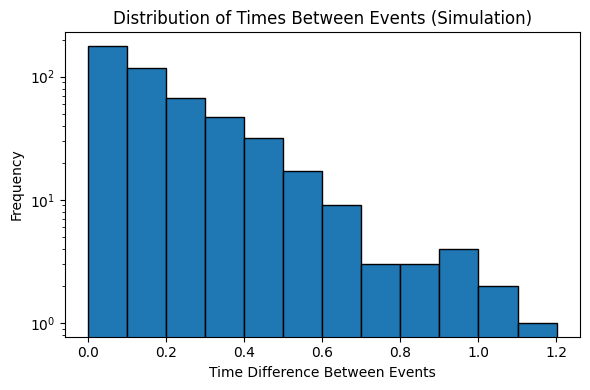

In [54]:
# 1. Calculate the time differences between consecutive arrival times
# time_diffs_exponential = np.diff(expected_arrival_times)
time_diffs_simulated = np.diff(simulated_arrival_times)

# Define the bin width
# You can change this value to see how it affects the histogram
bin_width = 0.1 # units of time

# Determine the overall range of the time differences from both datasets
# min_time_diff = min(np.min(time_diffs_exponential), np.min(time_diffs_simulated))
# max_time_diff = max(np.max(time_diffs_exponential), np.max(time_diffs_simulated))
min_time_diff = np.min(time_diffs_simulated)
max_time_diff = np.max(time_diffs_simulated)


# Create bins based on the specified bin width and the data range
bins = np.arange(min_time_diff, max_time_diff + bin_width, bin_width)


# 2. Create histograms of these time differences in subplots.
fig, ax = plt.subplots(1, 1, figsize=(6, 4)) # Changed to 1 subplot


# Plot the second histogram using the same bins
n_sim, _, patches_sim = ax.hist(time_diffs_simulated, bins=bins, edgecolor='black')
ax.set_xlabel("Time Difference Between Events")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Times Between Events (Simulation)")
ax.set_yscale('log') # Set y-axis to log scale


# 5. Display the plot.
plt.tight_layout()
plt.show()

## Observations

### -We are much more likely to observe short time intervals than long time  intervals.

### -For a Poisson process, these inter-event times are *exponentially* distributed.

### -How would you test this?

# Plot distribution of average count rate


**Reasoning**:
Calculate the average count rate for different time intervals and plot their distribution.



## Calculate Count Rate Distributions

In [55]:
# 1. Define a fixed time interval duration.
# interval_durations = [1, 5, 10, 20]  # Different time intervals to consider
interval_duration = 1 # Set a fixed interval duration for now


# Collect all calculated average count rates for both methods
# all_average_rates_exponential = []
all_average_rates_simulated = []


# 2-5. For each time interval duration, calculate and collect average rates.
# for interval_duration in interval_durations: # Commenting out the loop for now
# Determine the number of non-overlapping intervals of this size.
num_intervals = int(total_time / interval_duration)

# Create time bins for this interval duration.
time_bins = np.arange(0, num_intervals * interval_duration + interval_duration, interval_duration)

# Count the number of events in each interval for both methods.
# counts_exponential, _ = np.histogram(expected_arrival_times, bins=time_bins)
counts_simulated, _ = np.histogram(simulated_arrival_times, bins=time_bins)

# Calculate the average count rate for each interval for both methods.
# This will be just the counts per interval when interval_duration is 1
# average_rates_exponential = counts_exponential / interval_duration
average_rates_simulated = counts_simulated / interval_duration


# Collect the calculated average rates.
# all_average_rates_exponential.extend(average_rates_exponential)
all_average_rates_simulated.extend(average_rates_simulated)




## Plot Count Rate Distributions

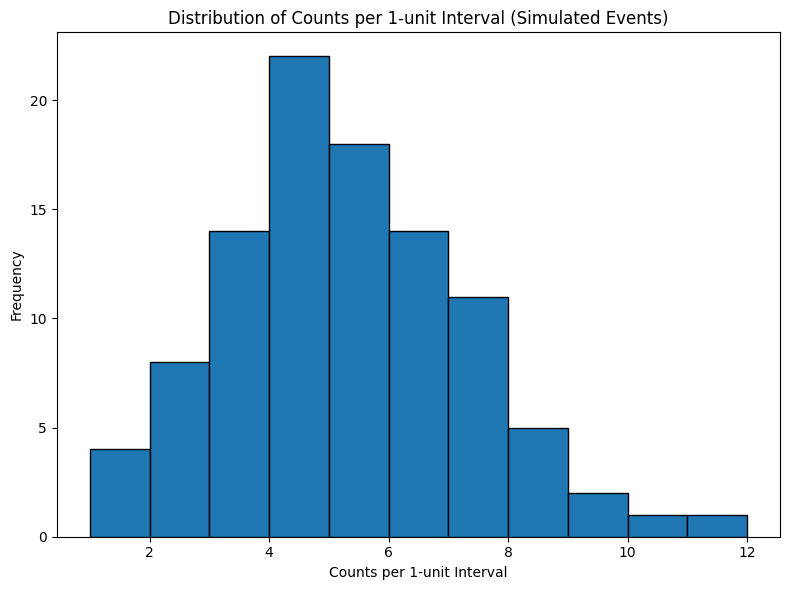

First moment (mean) of the simulated average count rates: 4.800


In [56]:
# Function to calculate the first moment (mean) of a distribution
def calculate_first_moment(data):
  """Calculates the first moment (mean) of a given data distribution."""
  return np.mean(data)

# 6. Create histograms of the collected average count rates in subplots.
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Changed to 1 subplot

# Define the bins based on the range of average count rates
# Ensure bins cover the full range of observed values
# min_rate = min(min(all_average_rates_exponential), min(all_average_rates_simulated))
# max_rate = max(max(all_average_rates_exponential), max(all_average_rates_simulated))
min_rate = np.min(all_average_rates_simulated)
max_rate = np.max(all_average_rates_simulated)
bins = np.arange(int(min_rate), int(max_rate) + 2, 1) # +2 to ensure the last bin includes the max value


# axes[0].hist(all_average_rates_exponential, bins=bins, edgecolor='black')

# # 7. Label the x-axis and y-axis for the first subplot.
# axes[0].set_ylabel("Frequency")

# # 8. Add a title to the first histogram.
# axes[0].set_title(f"Distribution of Counts per {interval_duration}-unit Interval (Exponential Method)")


ax.hist(all_average_rates_simulated, bins=bins, edgecolor='black')

# 7. Label the x-axis and y-axis for the second subplot.
ax.set_xlabel(f"Counts per {interval_duration}-unit Interval")
ax.set_ylabel("Frequency")

# 8. Add a title to the second histogram.
ax.set_title(f"Distribution of Counts per {interval_duration}-unit Interval (Simulated Events)")


# 9. Display the plot.
plt.tight_layout()
plt.show()

# Calculate and print the first moment of the simulated average count rates
first_moment_simulated = calculate_first_moment(all_average_rates_simulated)
print(f"First moment (mean) of the simulated average count rates: {first_moment_simulated:.3f}")

## Distribution of Average Count Rate

### This final histogram shows the distribution of the average counts during the measurement time interval. For longer averaging intervals, the measured average rate tends to be closer to the true underlying rate ($\lambda$), and the distribution becomes narrower. This demonstrates the concept that while individual counts are subject to Poisson fluctuations, averaging over longer periods provides a more precise estimate of the true rate.

**Key Takeaways from the Simulation:**

*   In a Poisson process with a constant average rate ($\lambda$), the number of events in a fixed interval follows a Poisson distribution.
*   The time between consecutive events in a Poisson process follows an exponential distribution with a mean of $1/\lambda$.
*   The measured count rate over time will fluctuate around the average rate due to the inherent randomness of the process.
*   Averaging the count rate over longer time intervals reduces the relative uncertainty in the measured rate, leading to a distribution of average rates that is more narrowly peaked around the true rate $\lambda$.

These simulations provide a hands-on illustration of the fundamental properties of Poisson statistics, which are crucial for understanding many phenomena in science and engineering.

# Extensions